# Stock Market Analysis and Prediction using Long Short Term Memory (LSTM)

### Installing the required Modules

In [2]:
# installing the yfinance modular
%pip install -q yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
# installing the seaborn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
# installing the pandas
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
# installing the numpy
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


## 1. Change in price of the stock Overtime

### Describing the Dataset

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-04,177.529999,180.139999,177.490005,177.580002,177.580002,37381500,AMAZON
2024-03-05,176.929993,176.929993,173.300003,174.119995,174.119995,37228300,AMAZON
2024-03-06,175.539993,176.460007,173.259995,173.509995,173.509995,32090900,AMAZON
2024-03-07,174.830002,177.990005,173.720001,176.820007,176.820007,34063300,AMAZON
2024-03-08,176.440002,178.789993,174.330002,175.350006,175.350006,37853500,AMAZON
2024-03-11,174.309998,174.470001,171.470001,171.960007,171.960007,28484800,AMAZON
2024-03-12,173.500000,176.759995,171.979996,175.389999,175.389999,36610600,AMAZON
2024-03-13,175.899994,177.619995,175.550003,176.559998,176.559998,30772600,AMAZON
2024-03-14,177.690002,179.529999,176.470001,178.750000,178.750000,43705800,AMAZON


### Descriptive Statistics about the Data

In [7]:
# Describing the Apple Data
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,180.211554,181.666295,178.890119,180.382112,179.890954,5.750040e+07
std,10.203647,10.061169,10.122922,10.060545,10.169606,1.721862e+07
min,155.070007,156.740005,154.149994,155.000000,154.177048,2.404830e+07
25%,173.010002,174.220001,171.675003,173.334999,172.699234,4.678545e+07
50%,180.669998,182.229996,178.550003,180.710007,180.238220,5.337730e+07
75%,189.294998,189.990005,187.695000,189.334999,188.909805,6.344460e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [8]:
# Describing the Google Data
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,129.310176,130.756435,128.164183,129.506474,129.506474,2.372488e+07
std,12.808689,12.762353,12.766494,12.757651,12.757651,8.892498e+06
min,100.839996,101.610001,100.279999,101.320000,101.320000,8.828600e+06
25%,122.080002,123.917500,121.474998,122.830002,122.830002,1.815580e+07
50%,131.970001,133.500000,130.750000,131.889999,131.889999,2.147350e+07
75%,138.595001,139.959999,137.555000,138.739998,138.739998,2.631035e+07
max,154.009995,155.199997,152.919998,154.839996,154.839996,7.614030e+07


In [9]:
# Describing the Microsoft Data
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,344.909960,347.941116,341.881195,345.094104,343.705541,2.588544e+07
std,38.289552,38.334263,38.098589,38.375575,39.003583,9.837698e+06
min,273.399994,275.000000,269.519989,272.230011,270.013916,1.017660e+07
25%,320.814987,324.240005,318.404999,321.095001,319.395615,2.042715e+07
50%,335.089996,337.959991,332.549988,335.399994,333.396942,2.339210e+07
75%,373.574997,375.550003,370.494995,374.300003,373.609100,2.779310e+07
max,420.559998,427.820007,417.989990,425.220001,425.220001,7.847820e+07


In [10]:
# Describing the Amazon Data
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,135.432072,136.976016,133.981355,135.559283,135.559283,5.385040e+07
std,20.732548,20.814288,20.725559,20.826721,20.826721,1.897677e+07
min,98.070000,98.300003,95.699997,97.239998,97.239998,2.237840e+07
25%,125.020000,126.864998,124.000000,125.395000,125.395000,4.274660e+07
50%,133.779999,135.139999,132.529999,133.679993,133.679993,4.978330e+07
75%,147.555000,148.915001,145.760002,147.449997,147.449997,5.976790e+07
max,177.690002,180.139999,177.490005,178.750000,178.750000,1.529387e+08


### Information About the Data

In [11]:
# Apple information
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-17 to 2024-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [12]:
# Google Information
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-17 to 2024-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [13]:
# Microsoft Information
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-17 to 2024-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [14]:
# Amazonr Information
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-17 to 2024-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


### Closing Price

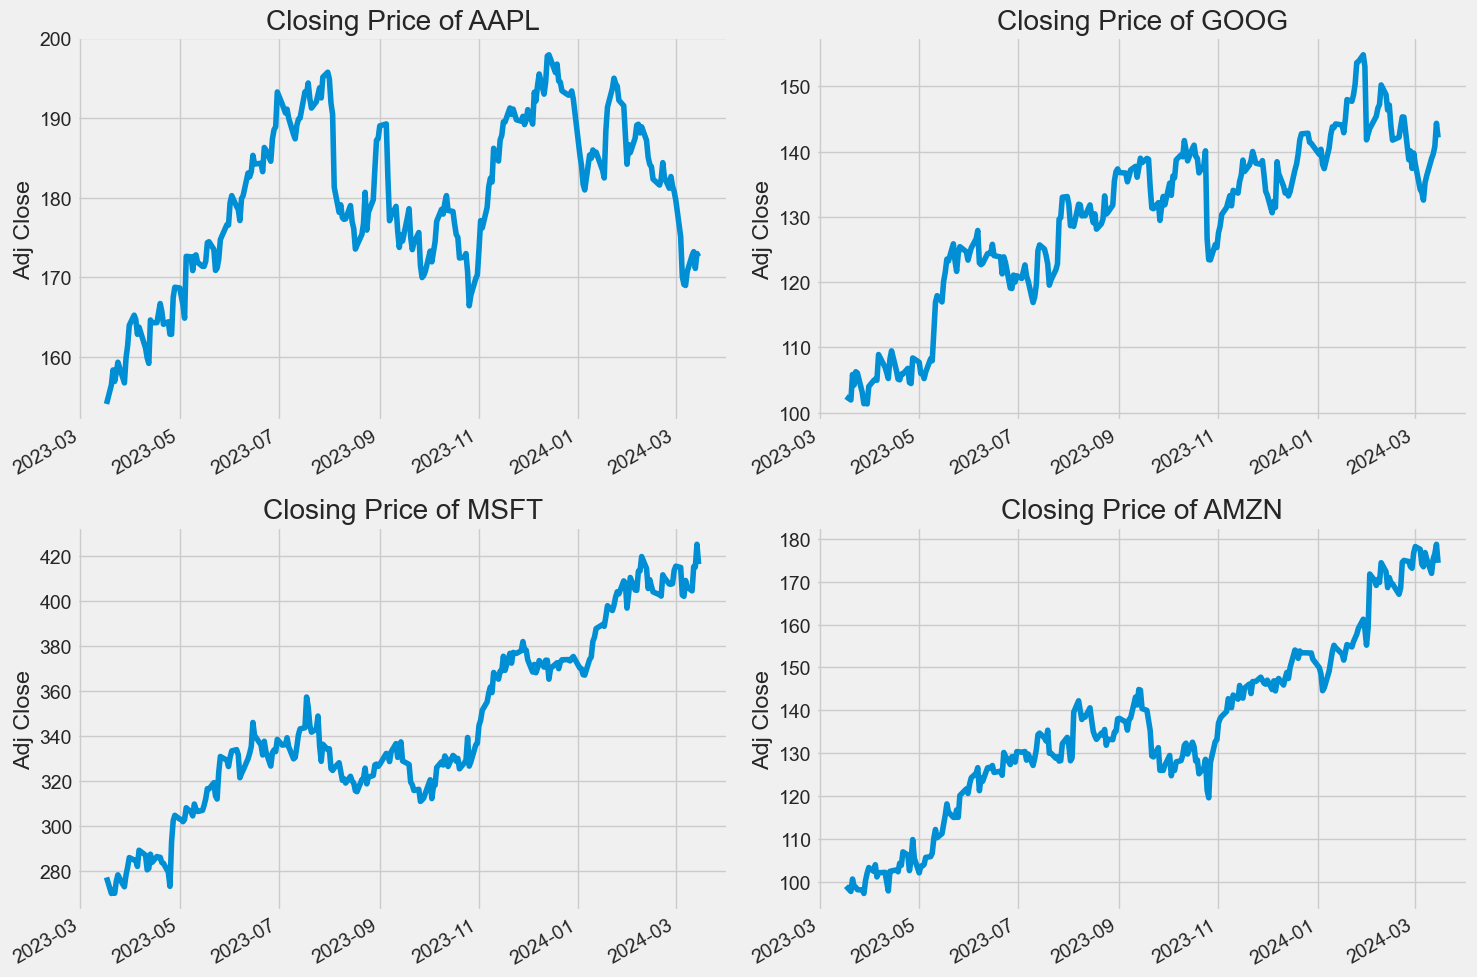

In [15]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

### Volume of Sales

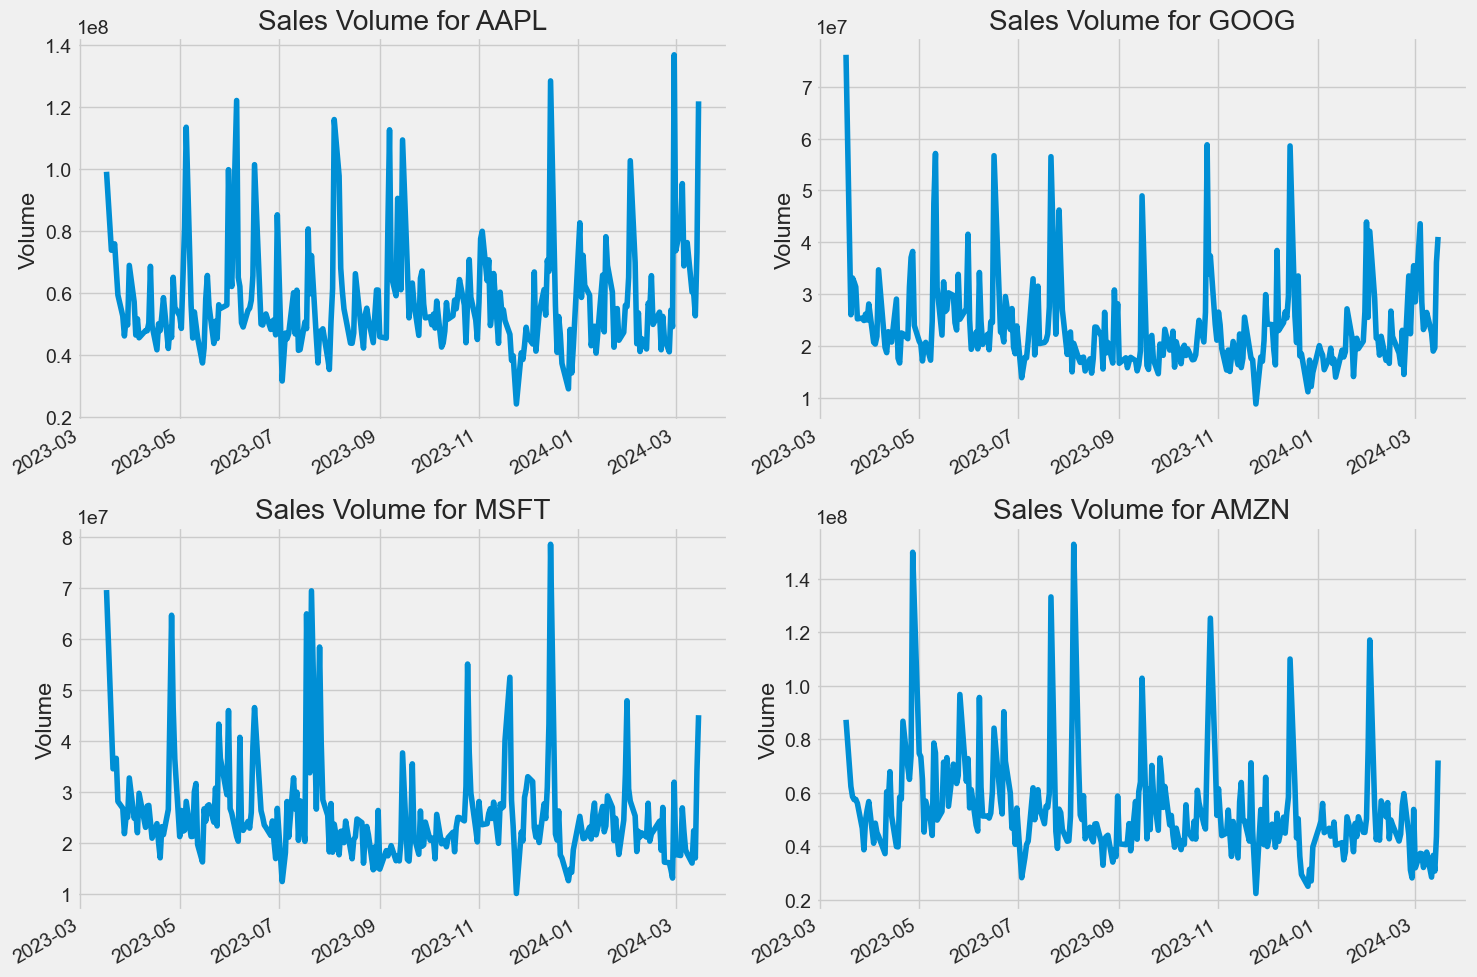

In [16]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

## 2. Moving Average of the Stocks

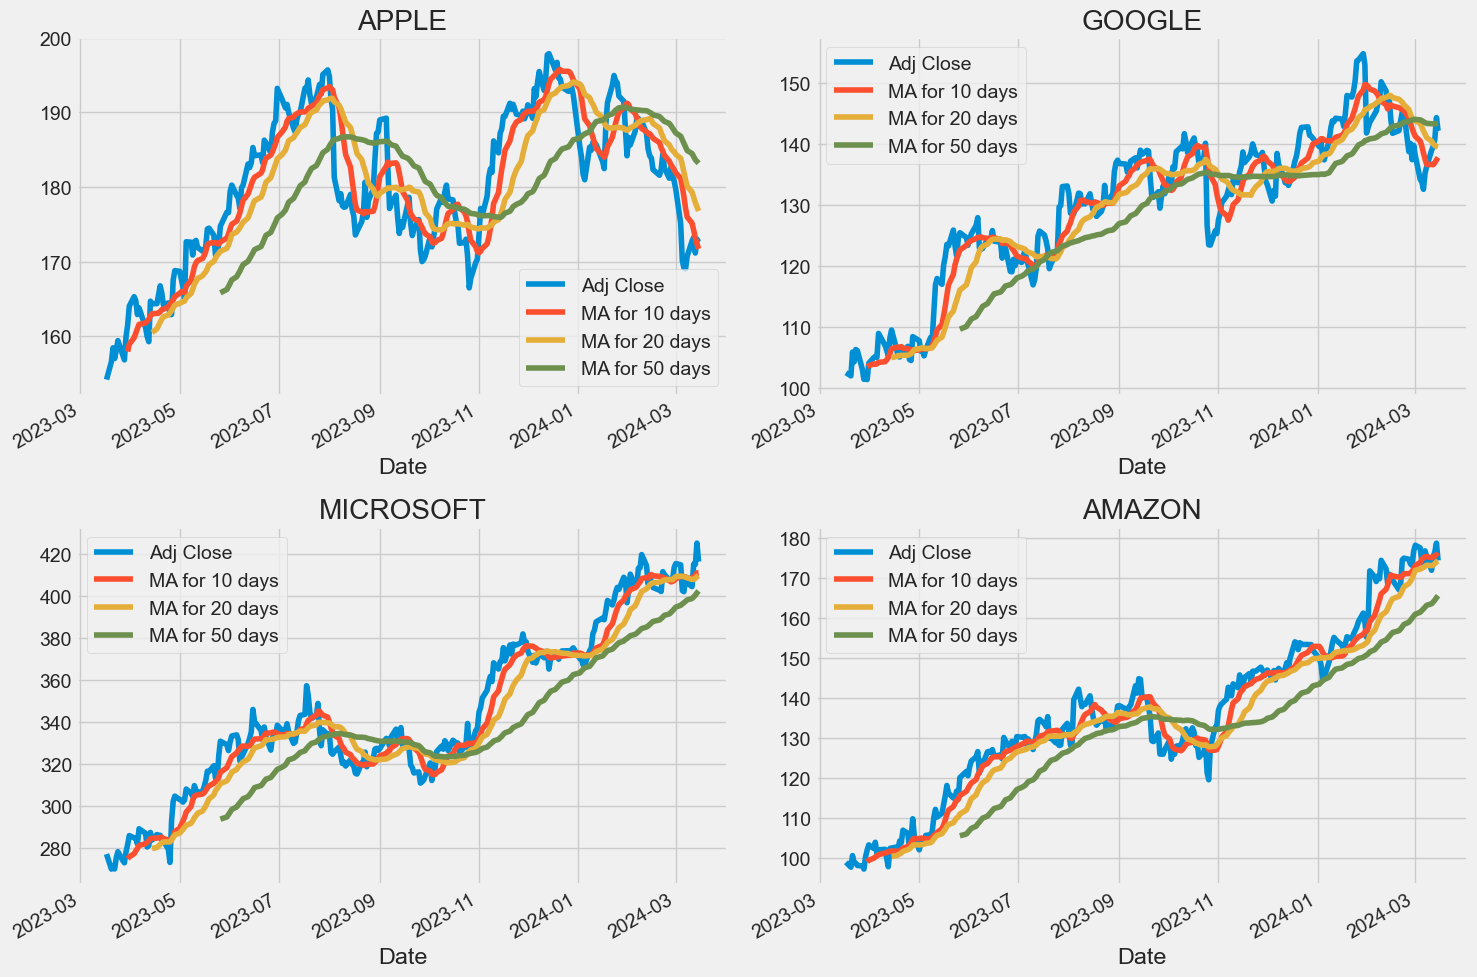

In [17]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## 3. Daily return of the stock on average

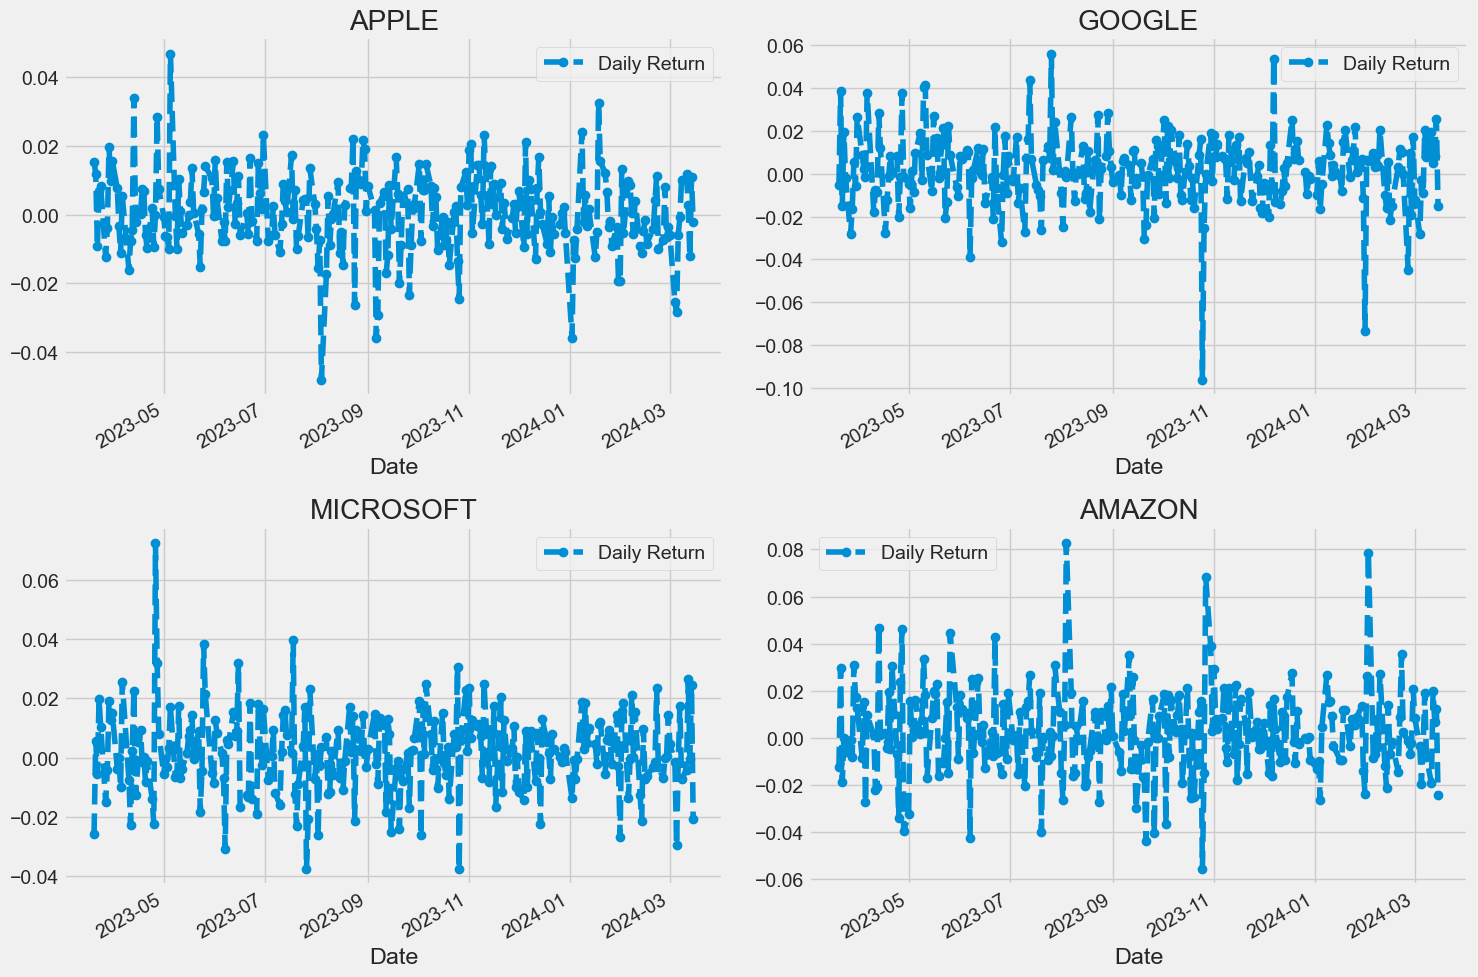

In [18]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

### Daily return using a histogram

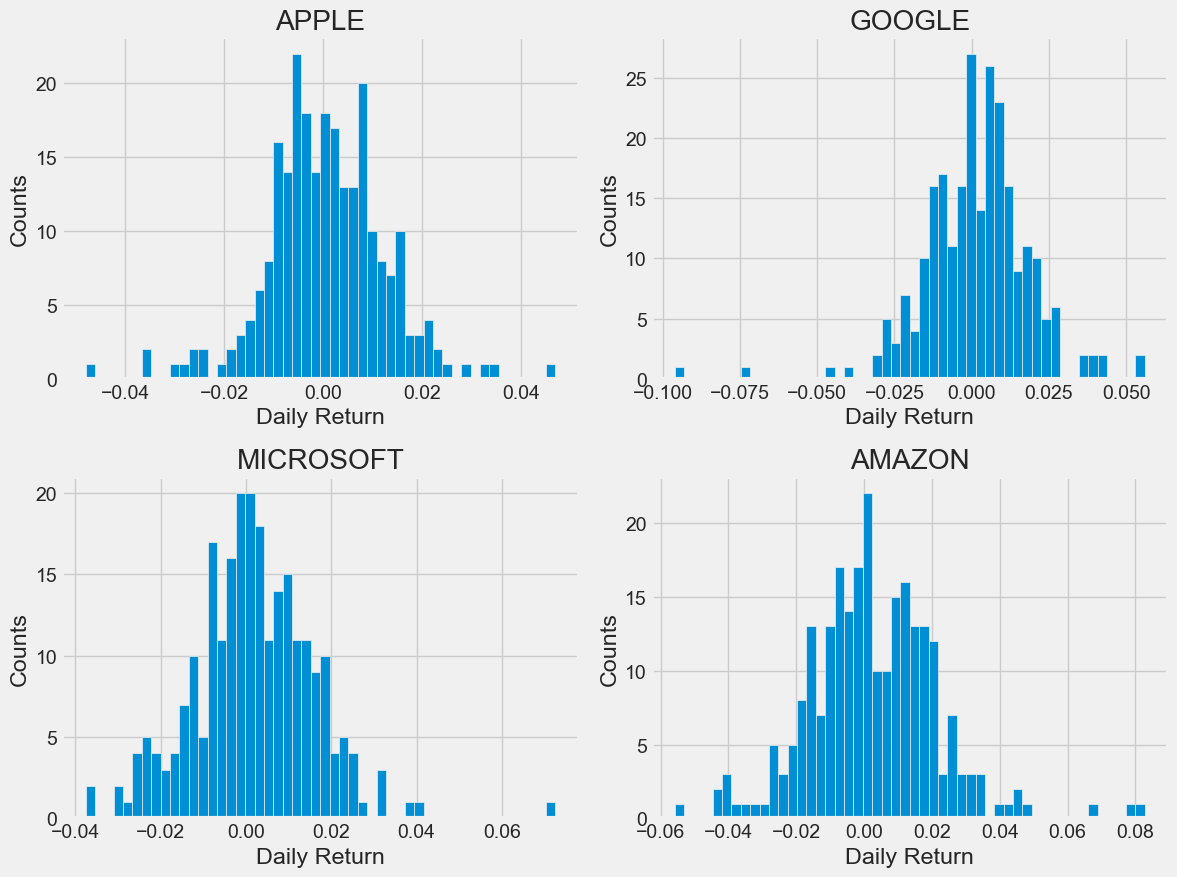

In [19]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## 4. Correlation between different stocks closing prices

In [20]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-03-17,NaN,NaN,NaN,NaN
2023-03-20,0.015484,-0.012532,-0.005173,-0.025767
2023-03-21,0.011944,0.029680,0.038360,0.005694
2023-03-22,-0.009103,-0.018984,-0.015306,-0.005442
2023-03-23,0.006970,0.000101,0.019574,0.019722


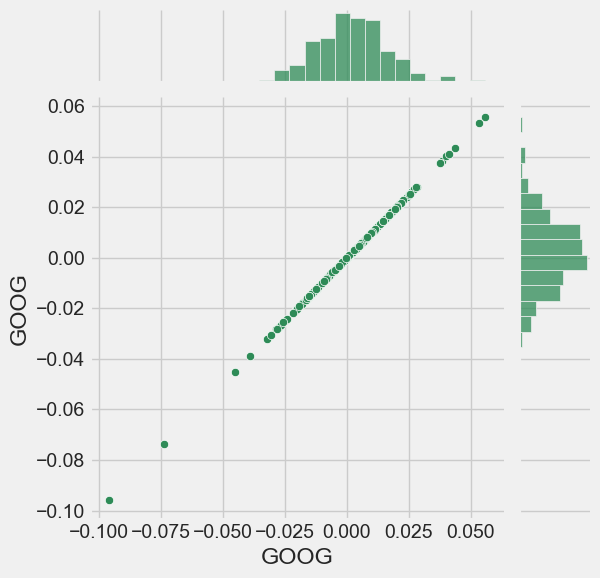

In [21]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

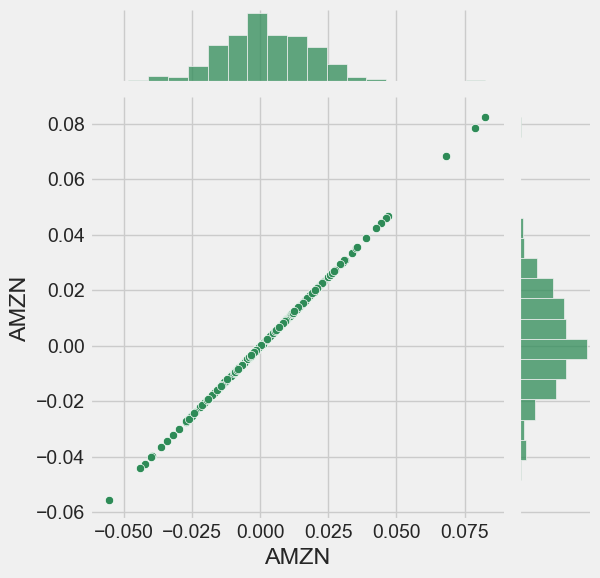

In [22]:
# Comparing Amazon to itself should show a perfectly linear relationship
sns.jointplot(x='AMZN', y='AMZN', data=tech_rets, kind='scatter', color='seagreen')

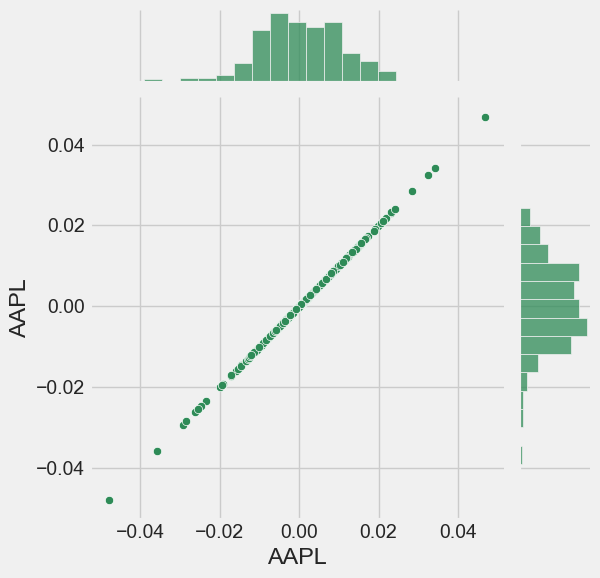

In [23]:
# Comparing Apple to itself should show a perfectly linear relationship
sns.jointplot(x='AAPL', y='AAPL', data=tech_rets, kind='scatter', color='seagreen')

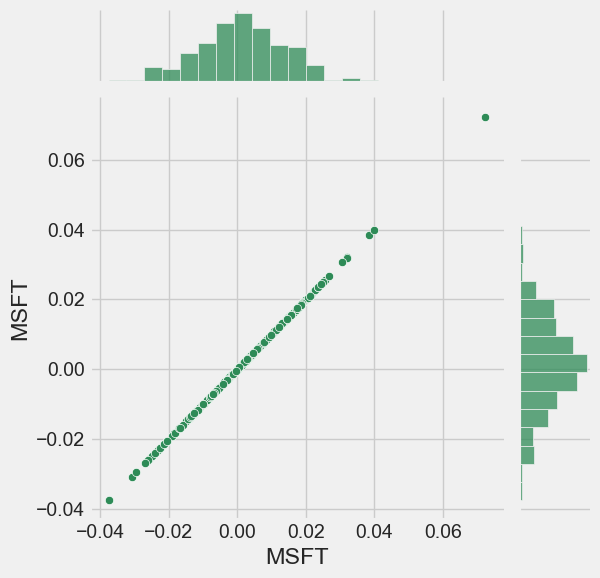

In [24]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='MSFT', y='MSFT', data=tech_rets, kind='scatter', color='seagreen')

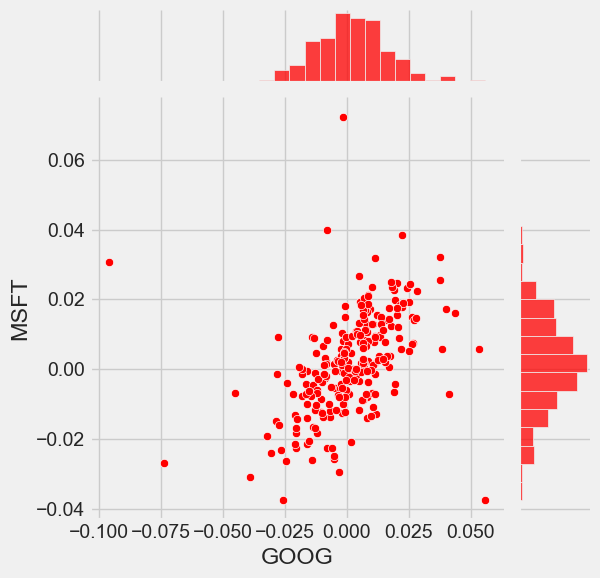

In [25]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter',color='red')

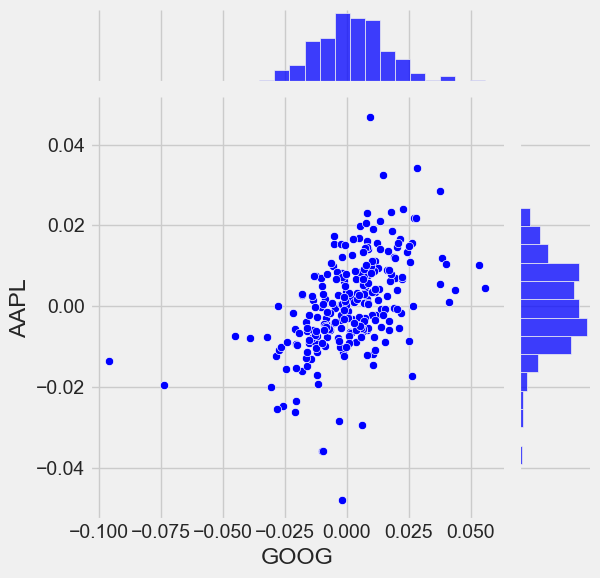

In [26]:
# We'll use joinplot to compare the daily returns of Google and Apple
sns.jointplot(x='GOOG', y='AAPL', data=tech_rets, kind='scatter',color='blue')

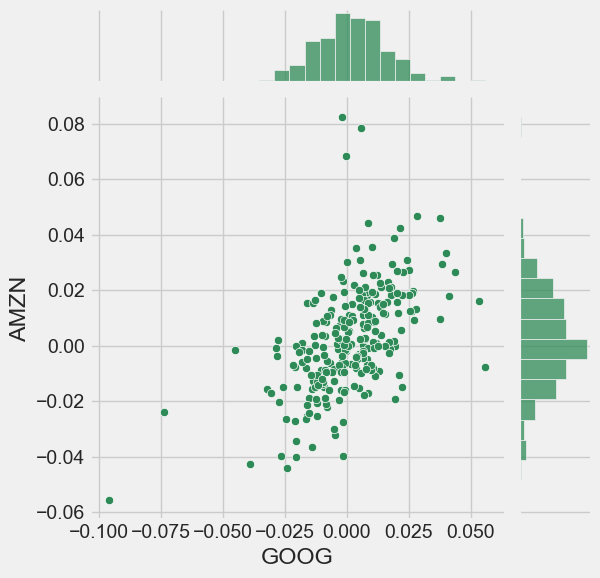

In [27]:
# We'll use joinplot to compare the daily returns of Google and Amazon
sns.jointplot(x='GOOG', y='AMZN', data=tech_rets, kind='scatter',color='seagreen')

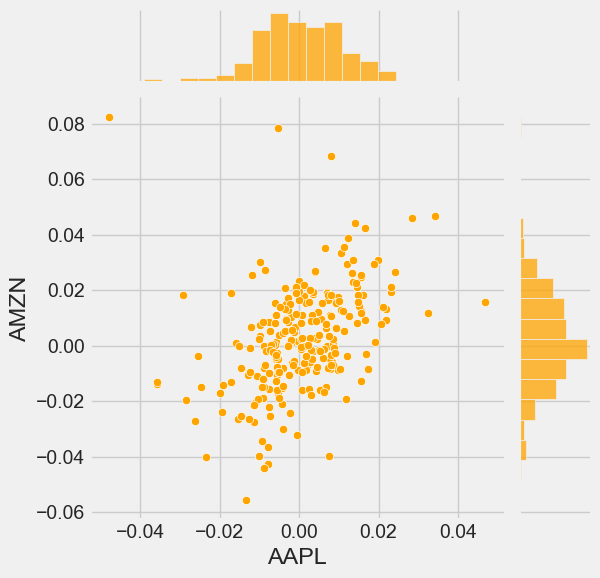

In [28]:
# We'll use joinplot to compare the daily returns of Apple and Amazon
sns.jointplot(x='AAPL', y='AMZN', data=tech_rets, kind='scatter',color='orange')

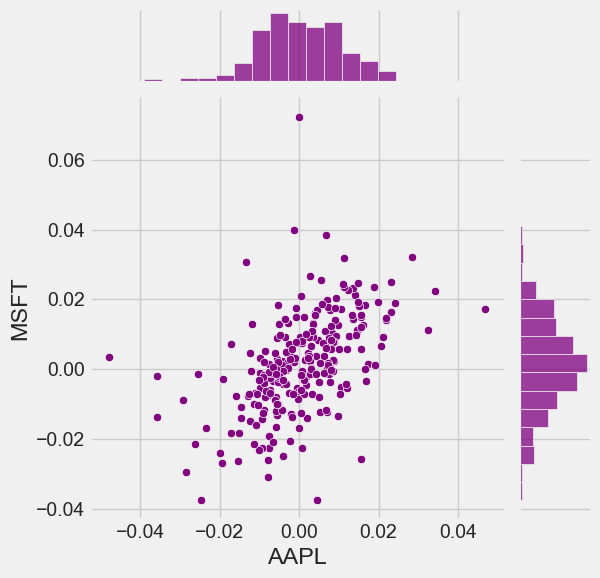

In [29]:
# We'll use joinplot to compare the daily returns of Apple and Microsoft
sns.jointplot(x='AAPL', y='MSFT', data=tech_rets, kind='scatter',color='purple')

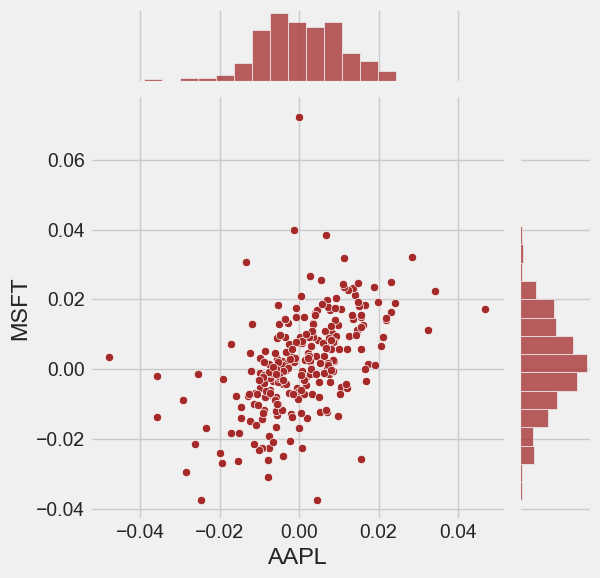

In [30]:
# We'll use joinplot to compare the daily returns of Amazon and Microsoft
sns.jointplot(x='AAPL', y='MSFT', data=tech_rets, kind='scatter',color='brown')

### Visual analysis of all the comparisons

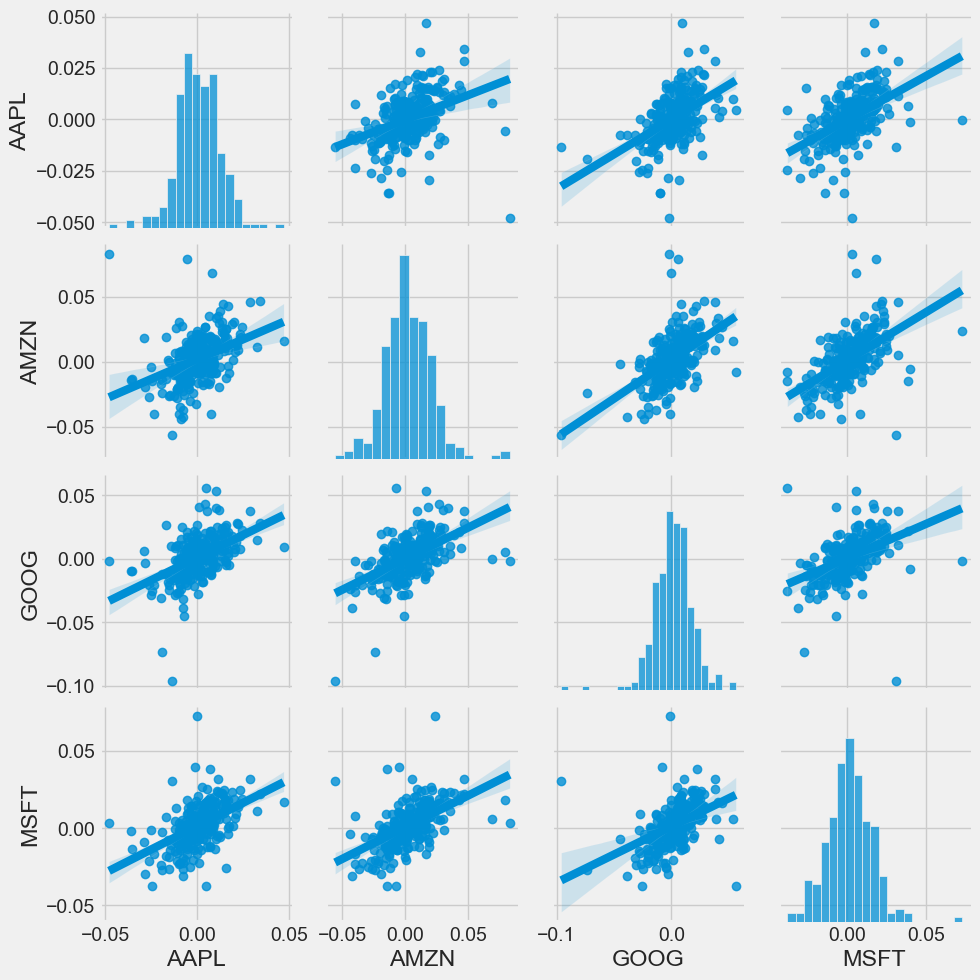

In [31]:
sns.pairplot(tech_rets, kind='reg')

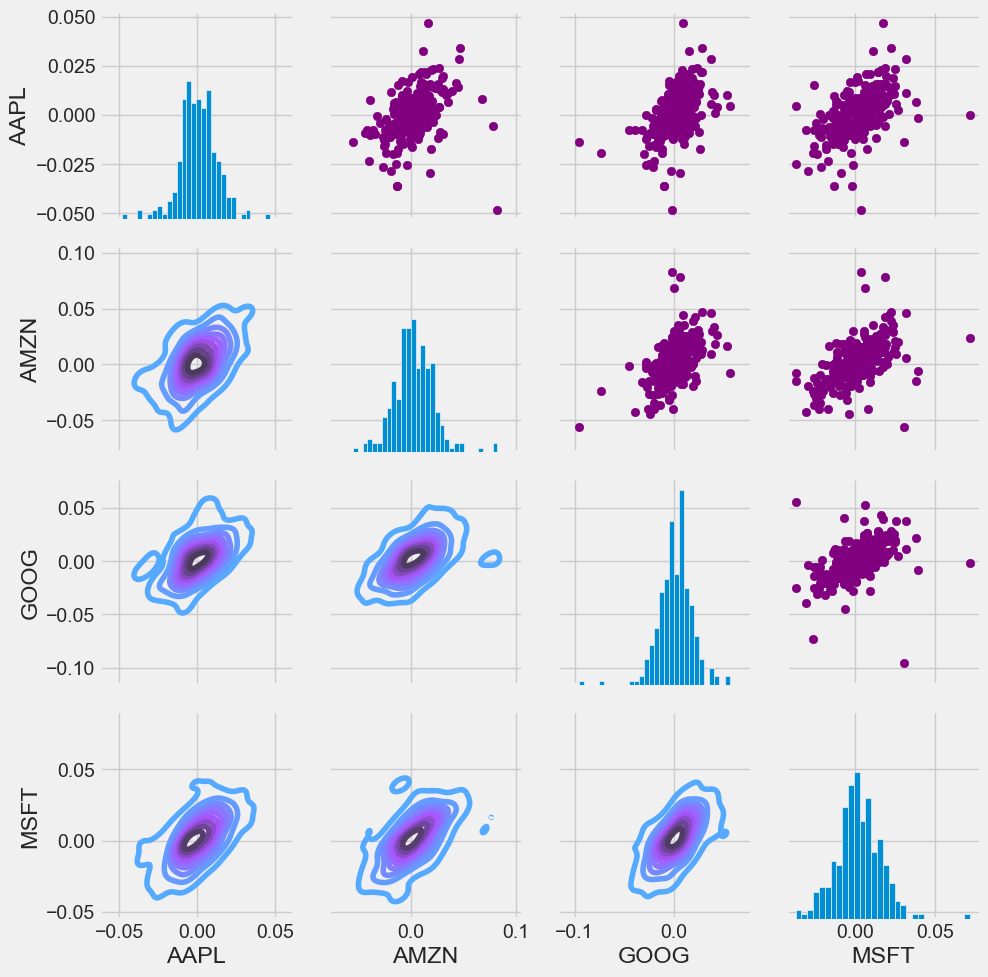

In [32]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

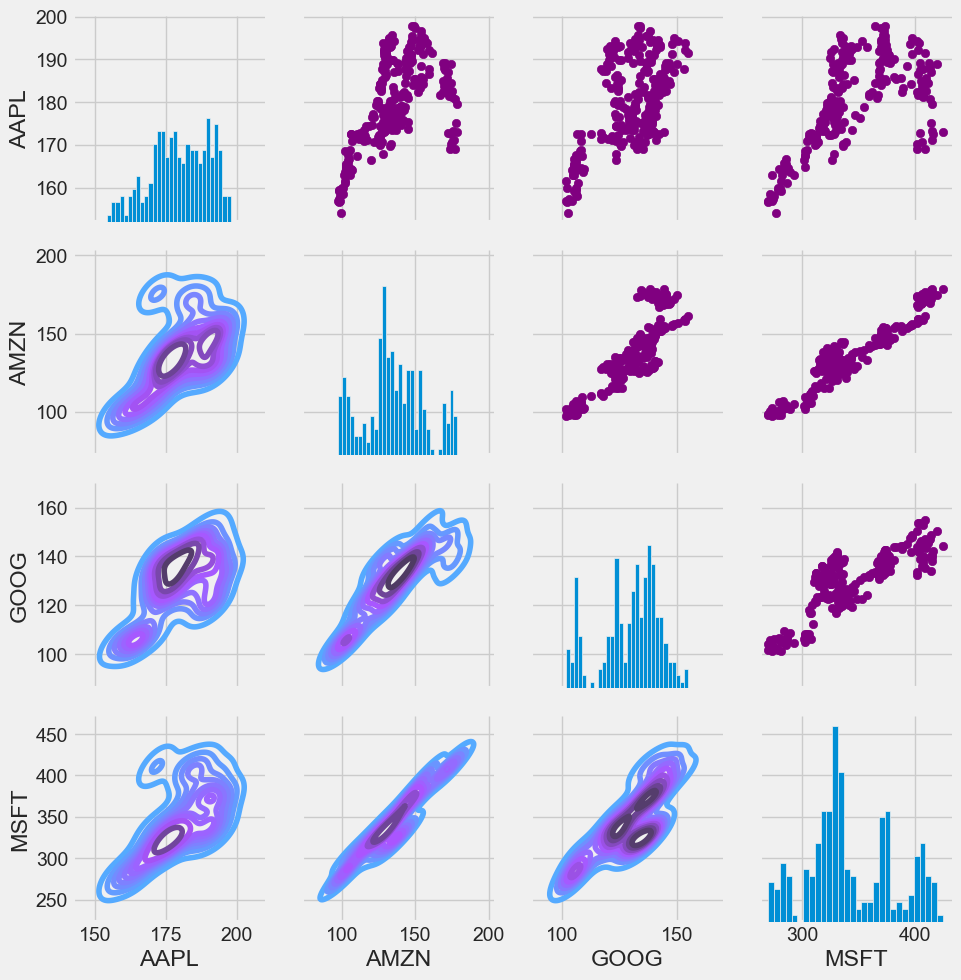

In [33]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

### Correlation of stock closing price

Text(0.5, 1.0, 'Correlation of stock closing price')

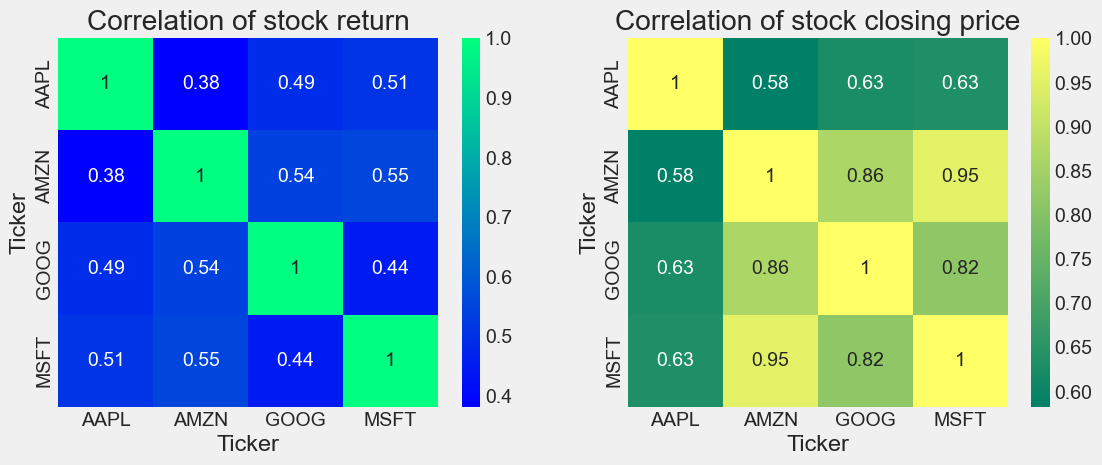

In [44]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='winter')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

## 5. Risk level by Investing in a particular Stock

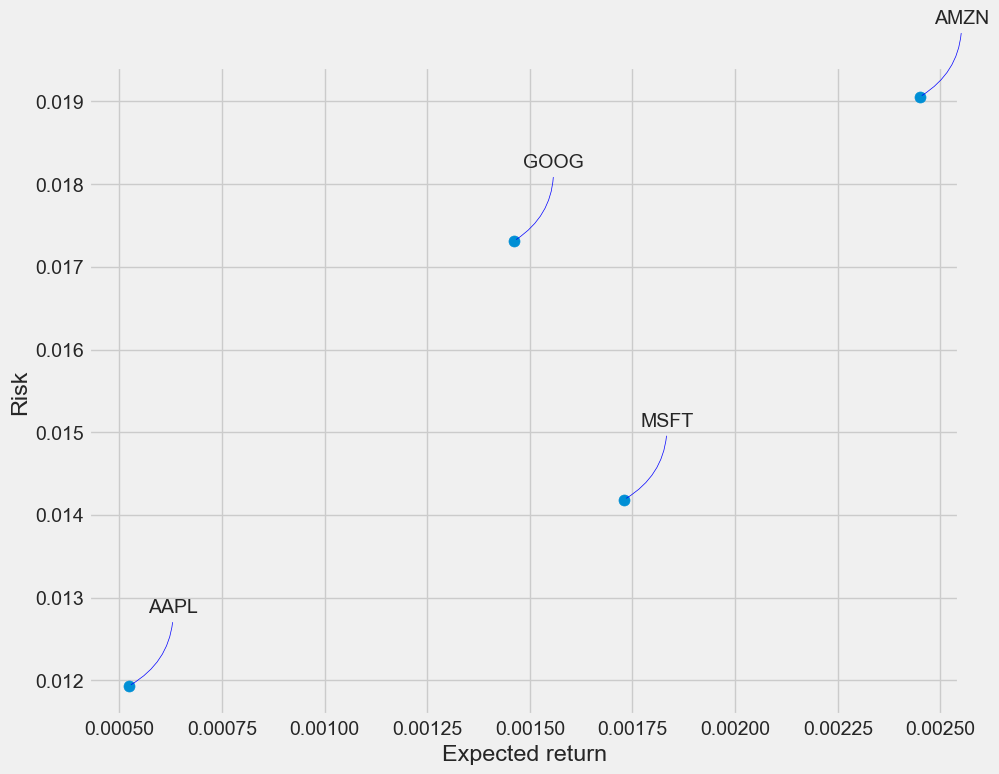

In [45]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))